## PoliticFact

In [1]:
import numpy as np
import pandas as pd
import os
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk import  pos_tag
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec


from textblob import TextBlob

import matplotlib.pyplot as plt 
from matplotlib import rcParams

import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression

from collections import Counter

import scipy.sparse  
from scipy.sparse import hstack, csr_matrix


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


In [2]:
base_dir= 'O:\Second Semister\dissertation\dis-dataset' 
dataset= 'Politicfact'
data_dir= os.path.join(base_dir, dataset)

In [3]:
file= 'politifact_factcheck_data.json'
adrs= os.path.join(data_dir, file)

In [4]:
pf=  pd.read_json(adrs, lines=True)
pf

,verdict,statement_originator,statement,statement_date,statement_source,factchecker,factcheck_date,factcheck_analysis_link
0,true,Barack Obama,John McCain opposed bankruptcy protections for...,6/11/2008,speech,Adriel Bettelheim,6/16/2008,https://www.politifact.com/factchecks/2008/jun...
1,false,Matt Gaetz,"""Bennie Thompson actively cheer-led riots in t...",6/7/2022,television,Yacob Reyes,6/13/2022,https://www.politifact.com/factchecks/2022/jun...
2,mostly-true,Kelly Ayotte,"Says Maggie Hassan was ""out of state on 30 day...",5/18/2016,news,Clay Wirestone,5/27/2016,https://www.politifact.com/factchecks/2016/may...
3,false,Bloggers,"""BUSTED: CDC Inflated COVID Numbers, Accused o...",2/1/2021,blog,Madison Czopek,2/5/2021,https://www.politifact.com/factchecks/2021/feb...
4,half-true,Bobby Jindal,"""I'm the only (Republican) candidate that has ...",8/30/2015,television,Linda Qiu,8/30/2015,https://www.politifact.com/factchecks/2015/aug...
...,...,...,...,...,...,...,...,...
21147,mostly-false,Donald Trump,Says the large trade deficit with Japan stems ...,8/13/2019,speech,Jon Greenberg,8/15/2019,https://www.politifact.com/factchecks/2019/aug...
21148,false,Donald Trump Jr.,"""Tens of thousands"" of people leave New York e...",11/1/2019,social_media,Jill Terreri Ramos,11/8/2019,https://www.politifact.com/factchecks/2019/nov...
21149,mostly-false,Chris Abele,"""I have fought for our shared values without b...",1/4/2011,news,Dave Umhoefer,1/13/2011,https://www.politifact.com/factchecks/2011/jan...
21150,false,Bloggers,"""Germany halts all Covid-19 vaccines, says the...",8/27/2021,blog,Ciara O'Rourke,9/9/2021,https://www.politifact.com/factchecks/2021/sep...


In [5]:
# select 10000 rows randomly
pf = pf.sample(n=10000, random_state=10)
pf

,verdict,statement_originator,statement,statement_date,statement_source,factchecker,factcheck_date,factcheck_analysis_link
14161,mostly-true,Bloggers,"""U.S. Embassy Celebrates America’s Independenc...",6/6/2015,social_media,Louis Jacobson,6/10/2015,https://www.politifact.com/factchecks/2015/jun...
12307,mostly-true,Jim Whelan,"""United States of America is twenty-sixth in s...",1/9/2012,speech,Bill Wichert,2/3/2012,https://www.politifact.com/factchecks/2012/feb...
5736,pants-fire,Chain email,Says the Obama administration plans to ban all...,11/27/2012,email,W. Gardner Selby,12/11/2012,https://www.politifact.com/factchecks/2012/dec...
6523,half-true,Rick Perry,"Since 2000, ""the Texas clean air program achie...",6/15/2010,news,Meghan Ashford-Grooms,6/16/2010,https://www.politifact.com/factchecks/2010/jun...
100,mostly-false,Tammy Baldwin,"""I led the fight to require the Coast Guard to...",7/30/2012,advertisement,Tom Kertscher,8/22/2012,https://www.politifact.com/factchecks/2012/aug...
...,...,...,...,...,...,...,...,...
17524,mostly-false,Facebook posts,"""FDA approval means nothing when you realize t...",8/23/2021,social_media,Jason Asenso,8/27/2021,https://www.politifact.com/factchecks/2021/aug...
13653,mostly-false,Charles Koch,"""EPA officials have commended (Koch Industries...",4/2/2014,news,Steve Contorno,4/4/2014,https://www.politifact.com/factchecks/2014/apr...
20527,half-true,Dave Aronberg,"Dave Aronberg ""was the first to demand that BP...",7/26/2010,other,Amy Sherman,7/29/2010,https://www.politifact.com/factchecks/2010/jul...
84,mostly-false,Facebook posts,"""Heidi Cruz, Ted’s wife, is managing director ...",2/21/2021,social_media,Ciara O'Rourke,2/23/2021,https://www.politifact.com/factchecks/2021/feb...


In [6]:
# save point 1, converting json to csv
pf.to_csv(os.path.join(data_dir,'politifact_factcheck_data.csv'), index= False)


In [7]:
PolitiFact= pd.read_csv(os.path.join(data_dir,'politifact_factcheck_data.csv'))

In [8]:
PolitiFact.head(2)

,verdict,statement_originator,statement,statement_date,statement_source,factchecker,factcheck_date,factcheck_analysis_link
0,mostly-true,Bloggers,"""U.S. Embassy Celebrates America’s Independenc...",6/6/2015,social_media,Louis Jacobson,6/10/2015,https://www.politifact.com/factchecks/2015/jun...
1,mostly-true,Jim Whelan,"""United States of America is twenty-sixth in s...",1/9/2012,speech,Bill Wichert,2/3/2012,https://www.politifact.com/factchecks/2012/feb...


###  visualization


In [9]:
def count_news_type(dataset, column):
    #Plotting the frequency plot
    ax = sns.countplot(y=column, data= dataset,
                       facecolor=(0, 0, 0, 0),
                       linewidth=1,
                       edgecolor=sns.color_palette("dark", 3))

    #Setting labels and font size
    ax.set(xlabel='Type of news', ylabel='Source of news',title='Count of news')
    ax.xaxis.get_label().set_fontsize(15)
    ax.yaxis.get_label().set_fontsize(15)

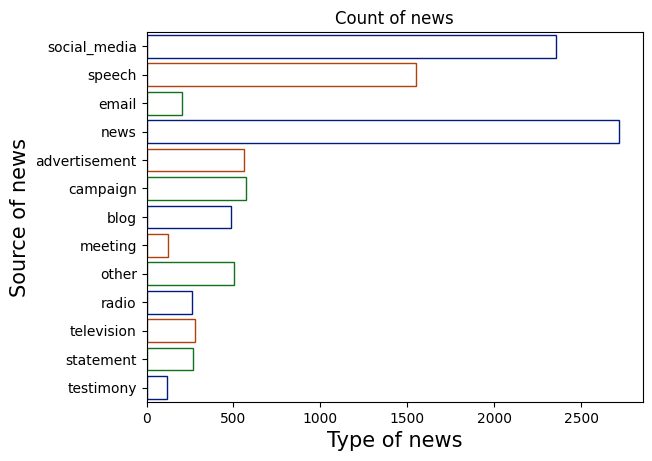

In [10]:
count_news_type(PolitiFact, 'statement_source')

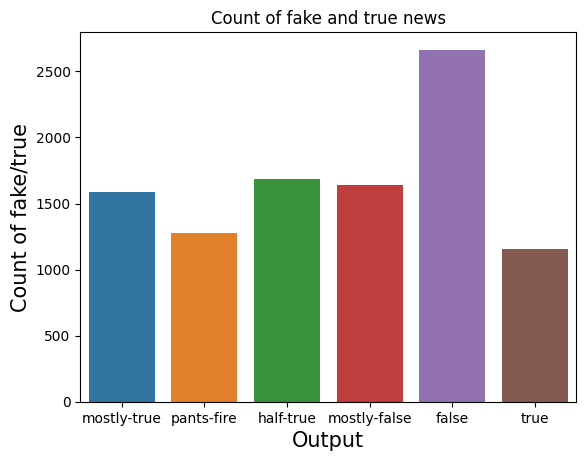

In [11]:
## Count of fake news and true news
ax=sns.countplot(x="verdict", data=PolitiFact)
#Setting labels and font size
ax.set(xlabel='Output', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

In [12]:
len(PolitiFact['statement_originator'].unique())

2787

In [13]:
PolitiFact['statement_source'].value_counts()

news             2716
social_media     2357
speech           1549
campaign          570
advertisement     562
other             502
blog              488
television        279
statement         270
radio             262
email             204
meeting           126
testimony         115
Name: statement_source, dtype: int64

In [14]:
PolitiFact['statement_originator'].value_counts()

Facebook posts                      869
Donald Trump                        449
Viral image                         425
Bloggers                            373
Barack Obama                        249
                                   ... 
Children's Healthcare of Atlanta      1
Jim Huffman                           1
Gary Sasse                            1
Ed Fallone                            1
Dave Aronberg                         1
Name: statement_originator, Length: 2787, dtype: int64

## Cleanning PolitiFact

In [15]:
PolitiFact.drop(['statement_date', 'factcheck_date', 'factcheck_analysis_link'], axis=1, inplace= True )
# PolitiFact.drop(['factcheck_analysis_link'], axis=1, inplace= True )

In [16]:
# PolitiFact['verdict'].value_counts()
PolitiFact.rename(columns= {'verdict': 'label'} ,  inplace= True)
PolitiFact

,label,statement_originator,statement,statement_source,factchecker
0,mostly-true,Bloggers,"""U.S. Embassy Celebrates America’s Independenc...",social_media,Louis Jacobson
1,mostly-true,Jim Whelan,"""United States of America is twenty-sixth in s...",speech,Bill Wichert
2,pants-fire,Chain email,Says the Obama administration plans to ban all...,email,W. Gardner Selby
3,half-true,Rick Perry,"Since 2000, ""the Texas clean air program achie...",news,Meghan Ashford-Grooms
4,mostly-false,Tammy Baldwin,"""I led the fight to require the Coast Guard to...",advertisement,Tom Kertscher
...,...,...,...,...,...
9995,mostly-false,Facebook posts,"""FDA approval means nothing when you realize t...",social_media,Jason Asenso
9996,mostly-false,Charles Koch,"""EPA officials have commended (Koch Industries...",news,Steve Contorno
9997,half-true,Dave Aronberg,"Dave Aronberg ""was the first to demand that BP...",other,Amy Sherman
9998,mostly-false,Facebook posts,"""Heidi Cruz, Ted’s wife, is managing director ...",social_media,Ciara O'Rourke


In [17]:
# Labeling 
mask= PolitiFact['label'].str.contains('true', case= False)
PolitiFact.loc[mask, 'label'] = 1  # Real

mask= PolitiFact['label']!= 1
PolitiFact.loc[mask, 'label'] = 0 # Fake

In [18]:
PolitiFact.head(2)

,label,statement_originator,statement,statement_source,factchecker
0,1,Bloggers,"""U.S. Embassy Celebrates America’s Independenc...",social_media,Louis Jacobson
1,1,Jim Whelan,"""United States of America is twenty-sixth in s...",speech,Bill Wichert


In [19]:
PolitiFact['label'].value_counts()

0    5577
1    4423
Name: label, dtype: int64

In [20]:
# factorizing, converting some columns text to code 
PolitiFact["statement_originator"] = pd.factorize(PolitiFact["statement_originator"])[0]
PolitiFact["statement_source"] = pd.factorize(PolitiFact["statement_source"])[0]
PolitiFact["factchecker"]= pd.factorize(PolitiFact['factchecker'])[0]



# Stopwords

In [21]:
#task2 : remove marks and stopwords
# defining a funtion to make the lowercase and remove links, square brackets, punctuation and words contianing numbers 
def review_cleaning(text):
    '''
    make the lowercase and remove links, square brackets, punctuation and words contianing numbers.  
    '''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(',()''', '', text)
    return text

In [22]:
# Tokenization and stopword
stop = stopwords.words('english')

PolitiFact['statement'] = PolitiFact['statement'].apply(lambda text: review_cleaning(text))

PolitiFact['statement']= PolitiFact['statement'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [23]:
# save point 2
PolitiFact.to_csv(os.path.join(data_dir,'politifact_stp.csv'), index= False)

In [24]:
PolitiFact= pd.read_csv(os.path.join(data_dir,'politifact_stp.csv'))

In [25]:
# fill NaNs with zeros
PolitiFact = PolitiFact.fillna(PolitiFact.mean(numeric_only=True))

In [26]:
PolitiFact.head(2)

,label,statement_originator,statement,statement_source,factchecker
0,1,0,us embassy celebrates america’s independence j...,0,0
1,1,1,united states america twentysixth school perfo...,1,1


## Feature Extraction

In [27]:
def feature_extraction(News, column):
    #Extracting the features from the news
    News['polarity'] = News[column].map(lambda text: TextBlob(str(text)).sentiment.polarity)
    News['review_len'] = News[column].astype(str).apply(len)
    News['word_count'] = News[column].apply(lambda x: len(str(x).split()))

    #Plotting the distribution of the extracted feature
    plt.figure(figsize = (20, 5))
    plt.style.use('seaborn-white')
    plt.subplot(131)
    sns.distplot(News['polarity'])
    fig = plt.gcf()
    plt.subplot(132)
    sns.distplot(News['review_len'])
    fig = plt.gcf()
    plt.subplot(133)
    sns.distplot(News['word_count'])
    fig = plt.gcf();

C:\Users\mahmoud\AppData\Local\Temp\ipykernel_11560\1703162373.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
C:\Users\mahmoud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mahmoud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

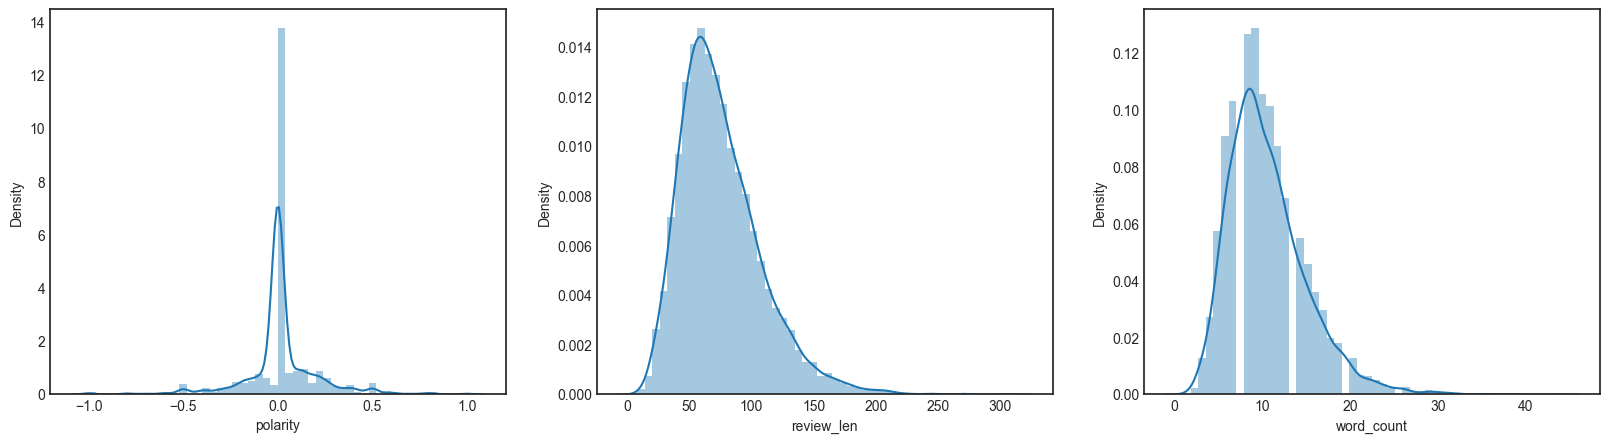

In [28]:
feature_extraction(PolitiFact, 'statement')

In [29]:
PolitiFact.head(3)

,label,statement_originator,statement,statement_source,factchecker,polarity,review_len,word_count
0,1,0,us embassy celebrates america’s independence j...,0,0,0.0,75,9
1,1,1,united states america twentysixth school perfo...,1,1,0.0,58,7
2,0,2,says obama administration plans ban weapons us...,2,2,0.0,78,10


## Feature selection
#### Filter method

In [30]:
features= PolitiFact.drop(['statement', 'label'], axis= 1)
features.head(2)

,statement_originator,statement_source,factchecker,polarity,review_len,word_count
0,0,0,0,0.0,75,9
1,1,1,1,0.0,58,7


## Feature selection
#### Filter method

In [31]:
# mutual_info_classif for feature selection
k_best_mi = SelectKBest(mutual_info_classif, k=6)  # Select top 100 features
features_selected_mi = k_best_mi.fit_transform(features, PolitiFact['label'])
# features_selected_mi
selected_feature_indices = k_best_mi.get_support(indices=True)
selected_column_mi = set(features.columns[selected_feature_indices])
selected_column_mi

{'factchecker',
 'polarity',
 'review_len',
 'statement_originator',
 'statement_source',
 'word_count'}

In [32]:
# f_classif for feature selection
k_best_f = SelectKBest(f_classif, k=6)  # Select top 6 features
X_selected_f = k_best_f.fit_transform(features, PolitiFact['label'])
selected_feature_indices = k_best_mi.get_support(indices=True)
selected_column_f_class = set(features.columns[selected_feature_indices])
selected_column_f_class

{'factchecker',
 'polarity',
 'review_len',
 'statement_originator',
 'statement_source',
 'word_count'}

In [33]:
# LASSO (L1 regularization) for feature selection
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(features, PolitiFact['label'])
# Get the absolute values of the coefficients
abs_coef = abs(lasso_model.coef_[0])

# Get the indices of the three largest coefficients (features with highest absolute coefficient values)
top_3_indices = abs_coef.argsort()[-6:][::-1]

# Get the names of the three best features
selected_features_lasso = features.columns[top_3_indices]

# Create the final feature matrix with the three selected features
features_selected_lasso = set(features[selected_features_lasso])

features_selected_lasso

{'factchecker',
 'polarity',
 'review_len',
 'statement_originator',
 'statement_source',
 'word_count'}

In [34]:
# 
# Calculate the correlation matrix
features= PolitiFact.drop(['statement'], axis= 1)
correlation_matrix = features.corr()

# Select features with high correlation to the target variable (absolute correlation values)
threshold = 0.015  
selected_features_corr = correlation_matrix[abs(correlation_matrix['label']) > threshold].index

# Create the final feature matrix
features_selected_corr = set(features[selected_features_corr])
features_selected_corr

{'factchecker',
 'label',
 'polarity',
 'review_len',
 'statement_originator',
 'statement_source',
 'word_count'}

#### Wrapper methods
##### using lasso for all features including news column

In [35]:
# Creating bag of words
def bow(corpus):
    vectorizer = CountVectorizer()
    news_features = vectorizer.fit_transform(corpus).toarray()
    return news_features

In [36]:
news_bow= bow(PolitiFact['statement'])
print('Shape of bag of words on news: ', news_bow)
print('The number of new columns is added to dataset is: ', news_bow.shape[1])

Shape of bag of words on news:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
The number of new columns is added to dataset is:  12959


In [37]:
def cancat_two_part(dataset, vertorized_feature):
    # Step 1: Scale the numerical features using StandardScaler and convert to a sparse matrix
    other_features = dataset.drop(columns=['statement', 'label'])
    scaler = StandardScaler()
    scaled_other_features = scaler.fit_transform(other_features)
    sparse_scaled_other_features = csr_matrix(scaled_other_features)

    # Step 2: Concatenate the sparse matrices for 'news' and numerical features
    all_features = hstack([vertorized_feature, sparse_scaled_other_features])

    return all_features

In [38]:
PolitiFact_bow= cancat_two_part(PolitiFact, news_bow)
PolitiFact_bow

<10000x12965 sparse matrix of type '<class 'numpy.float64'>'
	with 161652 stored elements in COOrdinate format>

In [39]:
PolitiFact.columns

Index(['label', 'statement_originator', 'statement', 'statement_source',
       'factchecker', 'polarity', 'review_len', 'word_count'],
      dtype='object')

In [40]:
# Information Gain feature selection method

In [41]:
def informatio_gain(dataset, label):

    # Calculate Information Gain using mutual information
    information_gains_all = mutual_info_classif(dataset, label)  # Exclude non-numeric columns
    # Print Information Gains for each feature
    columns = [ 'statement_originator', 'statement', 'statement_source','factchecker',
               'polarity', 'review_len', 'word_count']
    other_features= len(columns)
    selected_features= []
    information_gains= information_gains_all[-other_features:]
    for i, gain in enumerate(information_gains):
        print(f"Feature {columns[i]}: Information Gain = {gain:.6f}")
        selected_features.append(columns[i])
    return selected_features

In [42]:
selected_features_ig= informatio_gain(PolitiFact_bow, PolitiFact['label'])

Feature statement_originator: Information Gain = 0.000058
Feature statement: Information Gain = 0.306829
Feature statement_source: Information Gain = 0.046382
Feature factchecker: Information Gain = 0.095264
Feature polarity: Information Gain = 0.049737
Feature review_len: Information Gain = 0.012963
Feature word_count: Information Gain = 0.003732


C:\Users\mahmoud\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\mahmoud\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\mahmoud\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\mahmoud\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\U

In [43]:
selected_features_ig

['statement_originator',
 'statement',
 'statement_source',
 'factchecker',
 'polarity',
 'review_len',
 'word_count']

In [44]:
## Lasso feature selection 

In [45]:
def lasso_feature_selection(dataset, label):
    # getting features (X) and target (y)
    X = dataset
    y = label

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Lasso regression model
    lasso = Lasso(alpha=0.008)  
    lasso.fit(X_train, y_train)

    # Predict on the test set
    y_pred = lasso.predict(X_test)

    # Evaluate the model 
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    # Get the selected features (non-zero coefficients)
    non_zero_coefficient_indices  = np.where(lasso.coef_ != 0)[0]
    return non_zero_coefficient_indices

In [46]:
selected_features_indeces= lasso_feature_selection(PolitiFact_bow, PolitiFact['label'])
other_features_indeces= [index - news_bow.shape[1]-1 for index in selected_features_indeces if index - news_bow.shape[1] > 0]
features_list= features.columns.to_list()
selected_column_lass_wm= [feature for feature in features_list if features_list.index(feature) in other_features_indeces]
selected_column_lass_wm

Mean Squared Error: 0.23489864655395556


['label',
 'statement_originator',
 'statement_source',
 'factchecker',
 'polarity']

In [47]:
combined_list = list(features_selected_corr) + list(selected_column_mi) + list(selected_column_f_class) + \
                list(features_selected_lasso)+ selected_column_lass_wm 
# Count the occurrences of each element
element_counts = Counter(combined_list)
most_common_elements = element_counts.most_common()
most_common_elements

[('statement_originator', 5),
 ('polarity', 5),
 ('factchecker', 5),
 ('statement_source', 5),
 ('review_len', 4),
 ('word_count', 4),
 ('label', 2)]

In [48]:
# Retrieve the three most common elements
selected_features= [feature[0] for feature in most_common_elements if feature[1]>=4]
selected_features

['statement_originator',
 'polarity',
 'factchecker',
 'statement_source',
 'review_len',
 'word_count']

In [49]:
selected_features.insert(0, 'statement')
selected_features.append('label')
print(selected_features)
PolitiFact_selected= PolitiFact[selected_features].copy()
PolitiFact_selected.head(2)

['statement', 'statement_originator', 'polarity', 'factchecker', 'statement_source', 'review_len', 'word_count', 'label']


,statement,statement_originator,polarity,factchecker,statement_source,review_len,word_count,label
0,us embassy celebrates america’s independence j...,0,0.0,0,0,75,9,1
1,united states america twentysixth school perfo...,1,0.0,1,1,58,7,1


In [50]:
# save point 3
PolitiFact_selected.to_csv(os.path.join(data_dir,'PolitiFact_stp_fe_fS.csv'), index=False)

In [51]:
PolitiFact= pd.read_csv(os.path.join(data_dir,'PolitiFact_stp_fe_fS.csv'))


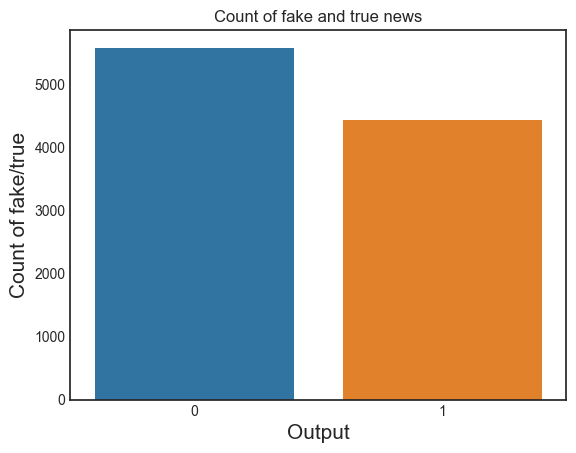

In [52]:
## Count of fake news and true news
ax=sns.countplot(x="label", data=PolitiFact)
#Setting labels and font size
ax.set(xlabel='Output', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

### Stemming

In [53]:
def stemming(column):
    stop_words = set(stopwords.words("english"))
    #Performing stemming on the review dataframe
    ps = PorterStemmer()

    #splitting and adding the stemmed words except stopwords
    corpus = []
    for i in range(0, len(PolitiFact)):
        news = re.sub('[^a-zA-Z]', ' ', str(PolitiFact[column][i]))
        news= news.lower()
        news = news.split()
        news = [ps.stem(word) for word in news if not word in stop_words]
        news = ' '.join(news)
        corpus.append(news) 

In [54]:
stemming('statement')

In [55]:
PolitiFact.head(2)

,statement,statement_originator,polarity,factchecker,statement_source,review_len,word_count,label
0,us embassy celebrates america’s independence j...,0,0.0,0,0,75,9,1
1,united states america twentysixth school perfo...,1,0.0,1,1,58,7,1


In [56]:
#save point 4 after stemming 
PolitiFact.to_csv(os.path.join(data_dir,'PolitiFact_stp_fS_fe_stm.csv'), index=False)

In [57]:
PolitiFact= pd.read_csv(os.path.join(data_dir,'PolitiFact_stp_fS_fe_stm.csv'))
PolitiFact

,statement,statement_originator,polarity,factchecker,statement_source,review_len,word_count,label
0,us embassy celebrates america’s independence j...,0,0.000000,0,0,75,9,1
1,united states america twentysixth school perfo...,1,0.000000,1,1,58,7,1
2,says obama administration plans ban weapons us...,2,0.000000,2,2,78,10,0
3,since texas clean air program achieved percent...,3,0.366667,3,3,93,13,1
4,led fight require coast guard buy engines us f...,4,-0.125000,4,4,62,10,0
...,...,...,...,...,...,...,...,...
9995,fda approval means nothing realize fda also ap...,5,0.000000,358,0,68,10,0
9996,epa officials commended koch industries ‘commi...,2785,0.000000,111,3,102,13,0
9997,dave aronberg first demand bp create billiondo...,2786,0.250000,6,8,71,10,1
9998,heidi cruz ted’s wife managing director goldma...,5,0.000000,12,0,77,11,0


In [58]:
train_dataset_adrs= os.path.join(data_dir,'train_data')
try:
    os.mkdir(train_dataset_adrs)
except  FileExistsError:
    pass

## Vectorization news column

### Bag of words

In [59]:
# bag of words
def bow(data):
    # Create a CountVectorizer object
    vectorizer = CountVectorizer()
    # Fit and transform the "news" column
    news_vectorized = vectorizer.fit_transform(data['statement'])
    # converting rest of features to sparse matrix to and concatenate with news columns which has been just vectorized
    rest= csr_matrix(data.drop(['statement', 'label'],axis= 1).values) 
    vectorized_data= hstack([news_vectorized,rest]) 
    return vectorized_data


In [60]:
PolitiFact_bow= bow(PolitiFact)
# from now, the name of datasets will be changed based on vectorization techniques
#save point 5, PolitiFact bag of words
scipy.sparse.save_npz(os.path.join(train_dataset_adrs,'PolitiFact_bow.npz'), PolitiFact_bow)
vec_tech_list= ['PolitiFact_bow.npz']

### N-gram analysis

In [61]:
# one gram 
def one_gram(data):
    # Create a CountVectorizer object with unigrams
    vectorizer = CountVectorizer(ngram_range=(1, 1))
    # Fit and transform the "news" column
    news_vectorized = vectorizer.fit_transform(data['statement'])
    # converting rest of features to sparse matrix to and concatenate with news columns which has been just vectorized
    rest= csr_matrix(data.drop(['statement', 'label'], axis= 1).values)
    vectorized_data= hstack([news_vectorized,rest])
    return vectorized_data

In [62]:
PolitiFact_one_gram= one_gram(PolitiFact)
#save point 6, PolitiFact one gram
vec_tech_list.append('PolitiFact_one_gram.npz')
scipy.sparse.save_npz(os.path.join(train_dataset_adrs,'PolitiFact_one_gram.npz'), PolitiFact_one_gram)

In [63]:
# bigram 
def bigram(data):
    # Create a CountVectorizer object with unigrams
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    # Fit and transform the "news" column
    news_vectorized = vectorizer.fit_transform(data['statement'])
    # converting rest of features to sparse matrix to and concatenate with news columns which has been just vectorized
    rest= csr_matrix(data.drop(['statement', 'label'], axis= 1).values)
    vectorized_data= hstack([news_vectorized,rest])
    return vectorized_data

In [64]:
PolitiFact_bigram= bigram(PolitiFact)
#save point 8, PolitiFact bigram
vec_tech_list.append('PolitiFact_bigram.npz')
scipy.sparse.save_npz(os.path.join(train_dataset_adrs,'PolitiFact_bigram.npz'), PolitiFact_bigram)

In [65]:
# trigram 
def trigram(data):
    # Create a CountVectorizer object with trigrams
    vectorizer = CountVectorizer(max_features=10000, ngram_range=(3, 3))
    # Fit and transform the "news" column
    news_vectorized = vectorizer.fit_transform(data['statement'])
    # converting rest of features to sparse matrix to and concatenate with news columns which has been just vectorized
    rest= csr_matrix(data.drop(['statement', 'label'], axis= 1).values)
    vectorized_data= hstack([news_vectorized,rest])
    return vectorized_data

In [66]:
PolitiFact_trigram= trigram(PolitiFact)
#save point 9, PolitiFact trigram
vec_tech_list.append('PolitiFact_trigram.npz')
scipy.sparse.save_npz(os.path.join(train_dataset_adrs,'PolitiFact_trigram.npz'), PolitiFact_trigram)

In [67]:
# one to trigram 
def one_to_trigram(data):
    # Create a CountVectorizer object with unigrams
    vectorizer = CountVectorizer(ngram_range=(1, 3))
    # Fit and transform the "news" column
    news_vectorized = vectorizer.fit_transform(data['statement'])
    # converting rest of features to sparse matrix to and concatenate with news columns which has been just vectorized
    rest= csr_matrix(data.drop(['statement', 'label'], axis= 1).values)
    vectorized_data= hstack([news_vectorized,rest])
    return vectorized_data

In [68]:
PolitiFact_one_to_trigram= one_to_trigram(PolitiFact)
#save point 10, PolitiFact one to trigram
vec_tech_list.append('PolitiFact_one_to_trigram.npz')
scipy.sparse.save_npz(os.path.join(train_dataset_adrs,'PolitiFact_one_to_trigram.npz'), PolitiFact_one_to_trigram)

In [69]:
# TFIDF 
def TFIDF(data):
    # Create a TfidfVectorizer object with unigrams and bigrams
    vectorizer = TfidfVectorizer( ngram_range=(1, 2))
    # Fit and transform the "news" column
    news_vectorized = vectorizer.fit_transform(data['statement'])
    # converting rest of features to sparse matrix to and concatenate with news columns which has been just vectorized
    rest= csr_matrix(data.drop(['statement', 'label'], axis= 1).values)
    vectorized_data= hstack([news_vectorized,rest])
    return vectorized_data

In [70]:
PolitiFact_TFIDF= TFIDF(PolitiFact)
#save point 11, PolitiFact TF
vec_tech_list.append('PolitiFact_TFIDF.npz')
scipy.sparse.save_npz(os.path.join(train_dataset_adrs,'PolitiFact_TFIDF.npz'), PolitiFact_TFIDF)

In [71]:
# Word to Vector
def W2V(data):
    # Tokenize the text data
    tokenized_news = [word_tokenize(news) for news in data['statement']]
    # Train Word2Vec model
    model = Word2Vec(sentences=tokenized_news, vector_size=100, window=5, min_count=1, sg=0)
    news_vectors = [model.wv[words] for words in tokenized_news]
    #converting vectorized list to np.array
#     news_vectors_array = np.array(news_vectors)
    news_vectors_mean = np.array([np.mean(vector_list, axis=0) for vector_list in news_vectors])
    rest= data.drop(['statement', 'label'], axis= 1).values
    combined_features = np.hstack((news_vectors_mean, rest))
    return csr_matrix(combined_features)

In [72]:
PolitiFact_W2V= W2V(PolitiFact)
#save point 12, PolitiFact Word to vector
vec_tech_list.append('PolitiFact_W2V.npz')
scipy.sparse.save_npz(os.path.join(train_dataset_adrs,'PolitiFact_W2V.npz'), PolitiFact_W2V)

### combined vectorization techniques 

In [73]:
# Combine Bag-of-Words and Word2Vec vectorization methods
def bow_w2v(data):
    # Bag-of-Words (BoW) vectorization
    bow_vectorizer = CountVectorizer()
    bow_matrix = bow_vectorizer.fit_transform(data['statement']).toarray()
    
    # Tokenize the text data for Word2Vec
    tokenized_news = [word_tokenize(news) for news in data['statement']]
    
    # Train Word2Vec model
    w2v_model = Word2Vec(sentences=tokenized_news, vector_size=100, window=5, min_count=1, sg=0)
    
    # Compute the mean of word vectors for each news article
    w2v_vectors = [np.mean(w2v_model.wv[words], axis=0) for words in tokenized_news]
    
    # Convert the list of mean vectors to a 2D array
    w2v_vectors_array = np.array(w2v_vectors)
    # taking rest of selected features
    rest= data.drop(['statement', 'label'], axis= 1).values
    # Combine BoW and Word2Vec vectors
    combined_vectors = np.hstack((bow_matrix, w2v_vectors_array, rest))
    
    return csr_matrix(combined_vectors)

In [74]:
# Call the vectorization function
PolitiFact_bow_w2v = bow_w2v(PolitiFact)
#save point 13, PolitiFact bag of word and  Word to vector combined dataset
vec_tech_list.append('PolitiFact_bow_w2v.npz')
scipy.sparse.save_npz(os.path.join(train_dataset_adrs,'PolitiFact_bow_w2v.npz'), PolitiFact_bow_w2v)


In [75]:
'''
Enhancing the result of Bag-of-Words (BoW) using Word2Vec can be done through
a technique known as "word embedding augmentation." The idea is to use the 
word vectors from Word2Vec to enhance the BoW representation of text. 
This can capture more semantic information and context compared to traditional BoW.
'''
def enhanc_bow_w2v(data):
    # Create BoW vectors using CountVectorizer
    bow_vectorizer = CountVectorizer()
    bow_matrix = bow_vectorizer.fit_transform(data['statement']).toarray()

    # Tokenize the text data for Word2Vec
    tokenized_news = [word_tokenize(news) for news in data['statement']]

    # Load a pre-trained Word2Vec model
    tokenized_news = [word_tokenize(news) for news in data['statement']]
    # Train Word2Vec model
    w2v_model = Word2Vec(sentences=tokenized_news, vector_size=100, window=5, min_count=1, sg=0)

    # Enhance BoW using Word2Vec
    enhanced_bow_matrix = []
    for doc_tokens in tokenized_news:
        enhanced_bow_vector = np.zeros(len(bow_vectorizer.get_feature_names_out()))
        for token in doc_tokens:
            if token in w2v_model.wv:
                w2v_vector = w2v_model.wv[token]
                bow_index = bow_vectorizer.vocabulary_.get(token)
                enhanced_bow_vector[bow_index] = np.mean(w2v_vector)
        enhanced_bow_matrix.append(enhanced_bow_vector)

    enhanced_bow_matrix = np.array(enhanced_bow_matrix)
    rest= data.drop(['statement', 'label'], axis= 1).values
    # Combine BoW and Word2Vec vectors
    combined_vectors = np.hstack((enhanced_bow_matrix, rest))
    # Convert the list of enhanced BoW vectors to a NumPy array
    return csr_matrix(combined_vectors)



In [76]:
PolitiFact_enhanc_bow_w2v= enhanc_bow_w2v(PolitiFact)
#save point 14, PolitiFact bag of word and Word to vector enhanced combined dataset
vec_tech_list.append('PolitiFact_enhanc_bow_w2v.npz')
scipy.sparse.save_npz(os.path.join(train_dataset_adrs,'PolitiFact_enhanc_bow_w2v.npz'), PolitiFact_enhanc_bow_w2v)

In [77]:
# Combine TFIDF and Word2Vec vectorization methods
def TFIDF_w2v(data):
    # Create a TfidfVectorizer object with unigrams and bigrams
    vectorizer = TfidfVectorizer( ngram_range=(1, 2))
    # Fit and transform the "news" column
    TFIDF_vectorized = vectorizer.fit_transform(data['statement'])
    # Tokenize the text data for Word2Vec
    tokenized_news = [word_tokenize(news) for news in data['statement']]
    # Train Word2Vec model
    w2v_model = Word2Vec(sentences=tokenized_news, vector_size=100, window=5, min_count=1, sg=0)  
    # Compute the mean of word vectors for each news article
    w2v_vectors = [np.mean(w2v_model.wv[words], axis=0) for words in tokenized_news]
    # Convert the list of mean vectors to a 2D array
    w2v_vectors_array = csr_matrix(w2v_vectors)
    # taking rest of selected features
    rest= csr_matrix(data.drop(['statement', 'label'], axis= 1).values)
    # Combine BoW and Word2Vec vectors
    combined_vectors = hstack((TFIDF_vectorized, w2v_vectors_array, rest))
    
    return combined_vectors

In [78]:
# Call the vectorization function
PolitiFact_TFIDF_w2v = TFIDF_w2v(PolitiFact)
#save point 15, PolitiFact TFIDF and  Word to vector combined dataset
# vec_tech_list.append('PolitiFact_TFIDF_w2v.npz')
scipy.sparse.save_npz(os.path.join(train_dataset_adrs,'PolitiFact_TFIDF_w2v.npz'), PolitiFact_TFIDF_w2v)

In [79]:
PolitiFact_TFIDF_w2v

<10000x85359 sparse matrix of type '<class 'numpy.float64'>'
	with 1247626 stored elements in Compressed Sparse Row format>

In [80]:
'''
Enhancing the result of TFIDF using Word2Vec can be done through
a technique known as "word embedding augmentation." The idea is to use the 
word vectors from Word2Vec to enhance the BoW representation of text. 
This can capture more semantic information and context compared to traditional BoW.
'''
def enhance_TFIDF_w2v(data):
    # Create TF-IDF vectors using TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['statement']).toarray()

    # Tokenize the text data for Word2Vec
    tokenized_news = [word_tokenize(news) for news in data['statement']]

    # Load a pre-trained Word2Vec model
    tokenized_news = [word_tokenize(news) for news in data['statement']]
    # Train Word2Vec model
    w2v_model = Word2Vec(sentences=tokenized_news, vector_size=100, window=5, min_count=1, sg=0)

    # Enhance BoW using Word2Vec
    enhanced_bow_matrix = []
    for doc_tokens in tokenized_news:
        enhanced_bow_vector = np.zeros(len(tfidf_vectorizer.get_feature_names_out()))
        for token in doc_tokens:
            if token in w2v_model.wv:
                w2v_vector = w2v_model.wv[token]
                bow_index = tfidf_vectorizer.vocabulary_.get(token)
                enhanced_bow_vector[bow_index] = np.mean(w2v_vector)
        enhanced_bow_matrix.append(enhanced_bow_vector)

    enhanced_bow_matrix = np.array(enhanced_bow_matrix)
    rest= data.drop(['statement', 'label'], axis= 1).values
    # Combine BoW and Word2Vec vectors
    combined_vectors = np.hstack((enhanced_bow_matrix, rest))
    # Convert the list of enhanced BoW vectors to a NumPy array
    return csr_matrix(combined_vectors)

In [81]:
PolitiFact_enhance_TFIDF_w2v= enhance_TFIDF_w2v(PolitiFact)
# save point 16, PolitiFact bag of word and  Word to vector enhanced combined dataset
vec_tech_list.append('PolitiFact_enhance_TFIDF_w2v.npz')
scipy.sparse.save_npz(os.path.join(train_dataset_adrs,'PolitiFact_enhance_TFIDF_w2v.npz'), PolitiFact_enhance_TFIDF_w2v)

In [82]:
PolitiFact_enhance_TFIDF_w2v.shape

(10000, 12965)

In [83]:
label= PolitiFact['label']
label.shape

(10000,)

In [84]:
# saving label column in a sperate sparce matrix file
label.to_csv(os.path.join(train_dataset_adrs, 'PolitiFact_label.csv'), index= False)

In [85]:
vec_tech_list

['PolitiFact_bow.npz',
 'PolitiFact_one_gram.npz',
 'PolitiFact_bigram.npz',
 'PolitiFact_trigram.npz',
 'PolitiFact_one_to_trigram.npz',
 'PolitiFact_TFIDF.npz',
 'PolitiFact_W2V.npz',
 'PolitiFact_bow_w2v.npz',
 'PolitiFact_enhanc_bow_w2v.npz',
 'PolitiFact_TFIDF_w2v.npz',
 'PolitiFact_enhance_TFIDF_w2v.npz']